# Native Python Perceptron Implementation

## Author: Mugdhesh Pandkar

Inspired by https://www.youtube.com/watch?v=GVsUOuSjvcg and https://en.wikipedia.org/wiki/Perceptron.

In [262]:
HEIGHT, WIDTH = 20, 20
weights = [[0] * WIDTH for x in range(HEIGHT)]
layer = [[0] * WIDTH for x in range(HEIGHT)]
BIAS = 6

## Visualizing the layer

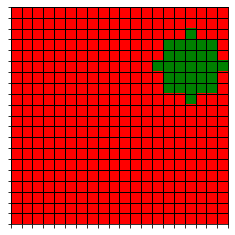

In [129]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np



def visualize(layer):
    cmap = colors.ListedColormap(['red', 'green'])
    bounds = [0, 0.5, 1]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots()
    ax.imshow(layer, cmap=cmap, norm=norm)

    # draw gridlines
    ax.grid(linestyle='-', color='k', linewidth=1)
    ax.set_xticks(np.arange(-0.5, 20, 1))
    ax.set_yticks(np.arange(-0.5, 20, 1))

    ax.set_yticklabels([])
    ax.set_xticklabels([])

    plt.show()

visualize(layer)

## Generating Training Data

### Rectangles

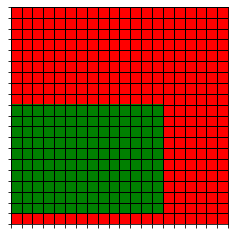

In [261]:
from random import randint
def generate_rect(layer):
    layer = [[0] * WIDTH for x in range(HEIGHT)]
    x = randint(0, WIDTH - 3)
    y = randint(0, HEIGHT -  3)

    width = randint(2, WIDTH - x)
    height = randint(2, HEIGHT - y)
    
    for i in range(y, y + height):
        for j in range(x, x + width):
            layer[i][j] = 1
    
    return layer

layer = generate_rect(layer)
visualize(layer)

### Circles

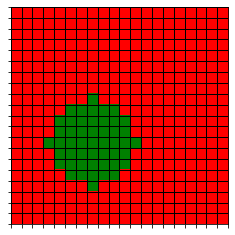

In [237]:
def generate_circle(layer):
    layer = [[0] * WIDTH for x in range(HEIGHT)]

    x = randint(2, WIDTH - 2)
    y = randint(2, HEIGHT - 2)

    minRadius = min(min(HEIGHT - 1 - y, y - 1), min(WIDTH - 1 - x, x - 1))


    r = 2 if minRadius < 2 else randint(2, minRadius)
    for i in range(HEIGHT):
        for j in range(WIDTH):
            if pow(j - x, 2) + pow(i - y, 2) <= r**2:
                layer[i][j] = 1
    
    return layer

layer = generate_circle(layer)
visualize(layer)

# Training

In [ ]:
def dot_product(weights, layer):
    sum = 0
    for i in range(len(weights)):
        for j in range(len(weights[0])):
            sum += weights[i][j] * layer[i][j]

def adjust_weights(weights, layer, label):
    sum = dot_product(weights, layer)
    pred = 0 if sum <= BIAS else 1
    if label != pred:
        

In [ ]:
for x in range(10): # epochs
    for y in range(100): # iterations
        label = randint(0, 1)
        layer = generate_rect(layer) if label == 0 else generate_circle(layer)
        
        